In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow import keras
import tensorflow as tf 



In [ ]:
mnist=tf.keras.datasets.mnist
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape,y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
x_train_final=x_train.reshape((-1,784))
x_train_final=x_train_final/255

In [ ]:
x_test_final=x_test.reshape((-1,784))
x_test_final=x_test_final/255

In [ ]:
model=keras.Sequential()
model.add(keras.layers.Dense(512,input_shape=(784,),activation="relu"))
model.add(keras.layers.Dense(256,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
results=model.fit(x=x_train_final,y=y_train,shuffle=True,epochs=30,batch_size=32,validation_data=(x_test_final,y_test),verbose=1)

Epoch 1/30
1875/1875 [==============================] - 11s 5ms/step - loss: 0.5676 - accuracy: 0.8558 - val_loss: 0.2969 - val_accuracy: 0.9173
Epoch 2/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.9214 - val_loss: 0.2371 - val_accuracy: 0.9323
Epoch 3/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2239 - accuracy: 0.9362 - val_loss: 0.1985 - val_accuracy: 0.9450
Epoch 4/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1894 - accuracy: 0.9463 - val_loss: 0.1727 - val_accuracy: 0.9501
Epoch 5/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1638 - accuracy: 0.9533 - val_loss: 0.1570 - val_accuracy: 0.9537
Epoch 6/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1439 - accuracy: 0.9592 - val_loss: 0.1393 - val_accuracy: 0.9599
Epoch 7/30
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1281 - accuracy: 0.9638 - val_loss: 0.1281 - val_accuracy

In [ ]:
predict=model.predict(x_test_final)
predict

313/313 [==============================] - 1s 2ms/step


array([[1.0032170e-06, 3.7401915e-07, 3.7730046e-05, ..., 9.9945754e-01,
        1.6641516e-06, 9.6814065e-06],
       [3.8053761e-07, 1.2624753e-04, 9.9976951e-01, ..., 4.7345457e-12,
        4.9280393e-06, 1.7760912e-12],
       [3.7444174e-06, 9.9793601e-01, 3.4068999e-04, ..., 9.6008327e-04,
        5.9778930e-04, 5.1569673e-06],
       ...,
       [4.3569295e-10, 5.4191746e-10, 1.6087359e-10, ..., 5.3144799e-06,
        1.8387524e-06, 1.8017310e-05],
       [2.8192098e-08, 3.6832304e-09, 2.8960545e-10, ..., 7.0342887e-10,
        1.1169020e-05, 3.8783288e-10],
       [6.7014703e-08, 1.3894239e-10, 1.7721001e-07, ..., 9.9862588e-13,
        2.3605220e-09, 2.8051506e-10]], dtype=float32)

Text(0, 0.5, 'accuracy')

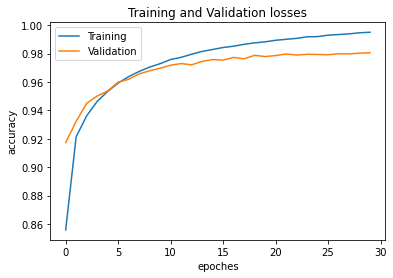

In [ ]:
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('accuracy')


Text(0, 0.5, 'loss')

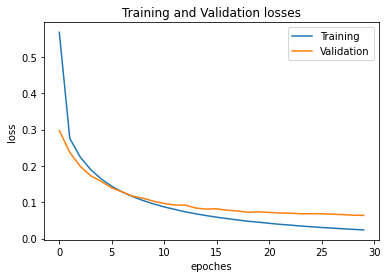

In [ ]:
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoches')
plt.ylabel('loss')
